Note on v 0.2.0:  
cleaned the file for submission

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from datetime import datetime as dt
import datetime

import code.get_mta_data as gmd
import code.process_mta_data as pmd
import code.analyze_mta_data as amd

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [3]:
mta = gmd.get_interem_ekand_v_0_n("ekand_clean_data_0.2.csv")


In [4]:
mta.DATE = pd.to_datetime(mta.DATE)

In [5]:
mta = mta.sort_values(['CA','UNIT','SCP','STATION','DATETIME'])
mta.head()

,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-02-24,07:00:00,REGULAR,6527794,2210507,2018-02-24 07:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-02-24,11:00:00,REGULAR,6527838,2210585,2018-02-24 11:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-02-24,15:00:00,REGULAR,6527994,2210644,2018-02-24 15:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-02-24,19:00:00,REGULAR,6528278,2210705,2018-02-24 19:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-02-24,23:00:00,REGULAR,6528389,2210728,2018-02-24 23:00:00


In [6]:

mta = pmd.add_ins_outs_to_df(mta)

In [7]:
mta = pmd.remove_outliers(mta)

In [8]:
mta.head()

,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME,INS,OUTS
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-02-24,11:00:00,REGULAR,6527838,2210585,2018-02-24 11:00:00,44.0,78.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-02-24,15:00:00,REGULAR,6527994,2210644,2018-02-24 15:00:00,156.0,59.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-02-24,19:00:00,REGULAR,6528278,2210705,2018-02-24 19:00:00,284.0,61.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-02-24,23:00:00,REGULAR,6528389,2210728,2018-02-24 23:00:00,111.0,23.0
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-02-25,03:00:00,REGULAR,6528417,2210734,2018-02-25 03:00:00,28.0,6.0


In [9]:
mta_day_grouped = amd.group_by_days(mta)

In [10]:
mta_day_grouped.head()

INS   OUTS
CA   UNIT SCP      STATION DATE                     
A002 R051 02-00-00 59 ST   2018-02-24   595.0  221.0
                           2018-02-25   501.0  177.0
                           2018-02-26  1399.0  386.0
                           2018-02-27  1465.0  507.0
                           2018-02-28  1455.0  520.0

In [11]:
mta_station_grouped = amd.group_by_station(mta_day_grouped)

In [12]:
d = mta_station_grouped.reset_index().DATE[0]
type(d)

pandas._libs.tslibs.timestamps.Timestamp

In [13]:
mta_station_freqs = amd.get_station_freqs(mta_station_grouped)

In [14]:
mta_station_freqs.head()

INS     OUTS
STATION DAY DAYNAME                    
1 AV    0   Monday     19056.0  20797.5
        1   Tuesday    20382.5  22750.0
        2   Wednesday  20659.5  22434.5
        3   Thursday   21241.0  22973.0
        4   Friday     21675.5  24332.0

In [15]:
mta_mean_across_weekdays = amd.mean_weekday_rankings(mta_station_freqs)

## Table for slide: "Busiest Stations on Weekdays

In [16]:
mta_mean_across_weekdays.head(10)

,INS,OUTS
STATION,,
34 ST-PENN STA,171641.8,149048.0
GRD CNTRL-42 ST,156473.4,137595.4
23 ST,120611.1,86982.0
34 ST-HERALD SQ,116479.1,108184.5
14 ST-UNION SQ,105772.2,92644.1
FULTON ST,101452.4,85074.8
TIMES SQ-42 ST,99689.2,92261.2
42 ST-PORT AUTH,90768.4,73997.2
86 ST,84544.4,72757.4


## Plot for slide: "Busiest Stations on Weekdays

In [17]:
plot_df = mta_mean_across_weekdays.head(10).reset_index()

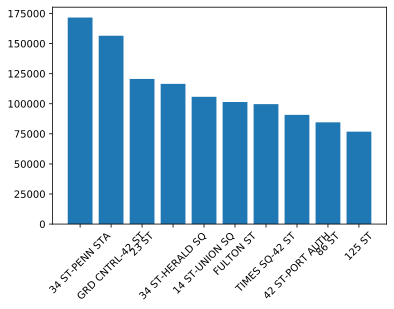

In [18]:


plt.bar(plot_df.STATION, plot_df.INS)
plt.xticks(rotation=45)
plt.savefig('ekand_weekday_busy_stations_eli_data.svg', format='svg', bbox_inches='tight')
plt.show()

## Plot for slide Average Daily MTA Entries

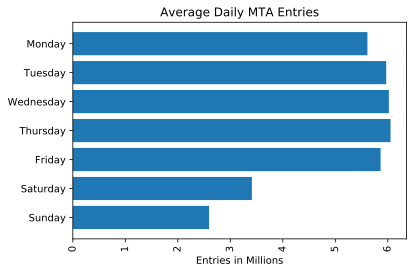

In [19]:
x = (mta_station_freqs
     .groupby(['DAY','DAYNAME'])
     .agg({'INS':'sum', 'OUTS':'sum'})
     .reset_index()
     .sort_values(['DAY'],ascending=False)
     ['DAYNAME']
    )
y = (mta_station_freqs
     .groupby('DAY')
     .agg({'INS':'sum', 'OUTS':'sum'})
     .reset_index()
     .sort_values(['DAY'],ascending=False)
     ['INS']/1000000
    )
plt.barh(x,y)
plt.xticks(rotation='vertical')
plt.title('Average Daily MTA Entries')
plt.xlabel('Entries in Millions')
plt.savefig('avg_entries.svg',type='svg',bbox_inches='tight')

## Plot for MTA Mean Across Weekends

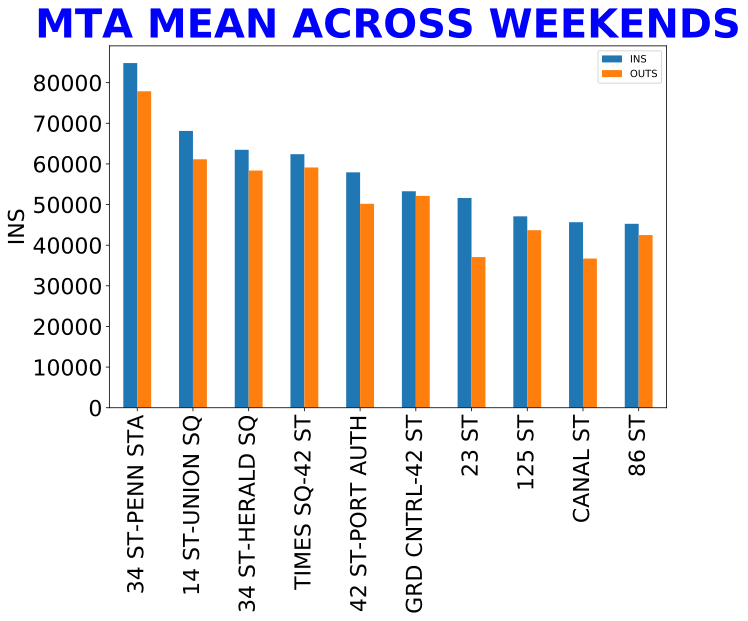

In [20]:
mta_mean_across_weekends = amd.mean_weekend_rankings(mta_station_freqs)
mta_mean_across_weekends_top = mta_mean_across_weekends.head(10)
ax = mta_mean_across_weekends_top.plot(kind='bar', figsize=(10, 6.667), legend=True, fontsize=22)
plt.title('MTA MEAN ACROSS WEEKENDS',fontsize = 40,weight='bold',color='blue');
ax.set_xlabel("", fontsize=22, color='black', labelpad=100)
ax.set_ylabel("INS", fontsize=22)
plt.savefig('MTA Mean AX Weekends.svg',bbox_inches='tight')

## Table for More Riders on Weekdays

In [21]:
amd.group_by_day_of_week(mta_station_grouped).round(-5)

,INS,OUTS
DAY,,
0,5600000.0,4300000.0
1,6000000.0,4600000.0
2,6000000.0,4600000.0
3,6100000.0,4600000.0
4,5900000.0,4500000.0
5,3400000.0,2800000.0
6,2600000.0,2100000.0
